In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('/content/Dataset for training final.xlsx')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['Name', 'Preferred time of order '], axis=1, inplace=True)

In [ ]:
df=df.astype('int')

In [ ]:
df

,Age,Gender,Frequency,Prediction
0,22,0,4,1
1,21,0,4,1
2,22,0,2,0
3,21,0,2,0
4,23,0,2,0
...,...,...,...,...
186,31,0,4,1
187,22,0,2,0
188,30,1,2,0
189,32,0,4,1


In [ ]:
df.describe()

,Age,Gender,Frequency,Prediction
count,183.000000,183.000000,183.000000,183.000000
mean,25.355191,0.409836,2.983607,0.666667
std,9.164526,0.504171,1.553003,0.472698
min,15.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,2.000000,0.000000
50%,23.000000,0.000000,2.000000,1.000000
75%,25.000000,1.000000,4.000000,1.000000
max,64.000000,2.000000,8.000000,1.000000


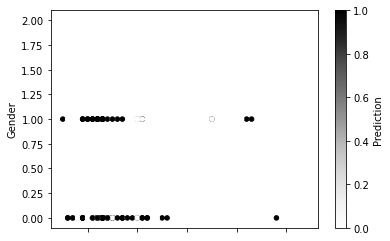

In [ ]:
df.plot.scatter('Age', 'Gender', c='Prediction')

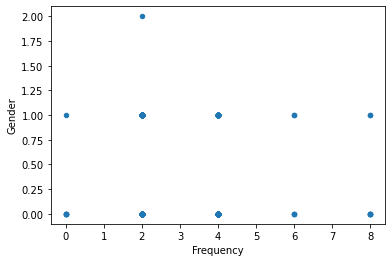

In [ ]:
df.plot('Frequency', 'Gender', kind='scatter')

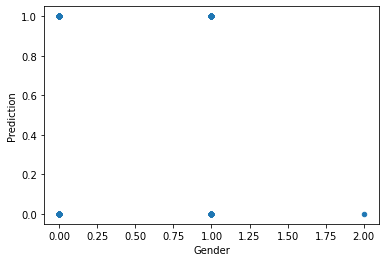

In [ ]:
df.plot('Gender', 'Prediction', kind='scatter')

In [ ]:
df.corr()

,Age,Gender,Frequency,Prediction
Age,1.000000,0.100256,-0.128905,-0.222108
Gender,0.100256,1.000000,-0.069603,-0.110189
Frequency,-0.128905,-0.069603,1.000000,0.563780
Prediction,-0.222108,-0.110189,0.563780,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:3]
Y=df.iloc[:,-1]

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.3)

In [ ]:
clf = LogisticRegression()
clf.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = clf.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(test_Y, preds))

0.8


In [ ]:
print(precision_score(test_Y, preds))

0.7555555555555555


In [ ]:
print(recall_score(test_Y, preds))

1.0


In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
X= np.array([56,0,2]).reshape(1,-1)
#X=np.reshape(-1,1)
#new_df = pd.DataFrame(X[])
loaded_model.predict(X)

array([0])

In [ ]:
X= np.array([21,1,2]).reshape(1,-1)
#X=np.reshape(-1,1)
#new_df = pd.DataFrame(X[])
out = loaded_model.predict(X)
print(out)

[1]
